# VACCINATION CAMPAIGN CLASSIFICATION MODEL

## Business Problem

The  **National Vaccination Advisory committee** under the Government's Public Health Office aims to provide vaccination
to the whole country and prevent the spread of seasonal flu and H1N1 flu. However, The National Vaccination Advisory faces a
challenge on how to administer the vaccine since it isn't compulsory yet it is vital at the same time. Based on the previous
vaccination campaigns, the government has had a tough time of deciding which group of citizens are likely to turn up for a 
vaccination and which are not. Moving forward, National Vaccination Advisory committee wishes to understand which factors
contribute to a voluntary intake of the vaccine by the public given a warning of a flu and which factors do not. This information is beneficial to the National Vaccination Advisory committee as it would make it easier for them to identify and direct the necessary resources towards vaccination campaigns, awarness, disease mitigation and procurement procedures.

## Data Understanding

The data used in this project is from the National 2009 H1N1 Flu Survey collected to monitor vaccination rates during the US
government vaccination campaigns. The survey asked people whether they had received H1N1 and seasonal flu vaccines. In the 
survey questions ranging from  personal,social, economic to demographic and opinion questions among others were asked in order
to have a better understanding of how these characteristics are associated with personal vaccination patterns and how the National Vaccination Advisory committee can provide guidance for future public health efforts.

This notebook contains three datasets namely:

(a) training_set_features.csv = contains citizens information on their vaccine awarness, personal information, behavioral information and their opinions on vaccination.

(b)training_set_labels.cs = contains information on whether a particular citizen was vaccinated or not.
 
(c)test_set_features.csv = contains citizens information as well, but it will be used to test how well our model predicts new data

The training_set_features.csv contains 26707 Rows and 35 columns
training_set_labels.cs contains information whether a respondent was vaccinated or not. (0) for No and (1) for yes

**Please follow along as we explore and get a better understanding of the data together**

### 1. Loading the data

In [634]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
##visualize Pipeline
from sklearn import set_config
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

pd.set_option("display.max_columns", 100)

In [635]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

Load the training set dataset. 

It contains citizens data which will be used to train our model

In [636]:
features_df = pd.read_csv(
    "Datasets/training_set_features.csv", 
    index_col="respondent_id"
)
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [637]:
features_df.shape

(26707, 35)

Loading the training set labels.

0 for didn't take the vaccine, 1 for took the vaccine

In [638]:
labels_df = pd.read_csv(
    "Datasets/training_set_labels.csv", 
    index_col="respondent_id"
)
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


Loading the test set dataset

In [639]:
test_df = pd.read_csv(
    "Datasets/test_set_features.csv", 
    index_col="respondent_id"
)
test_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


Combining the training set dataset and the labels for a better understanding of the data.

Columns h1n1_vaccine and seasonal_vaccine were added. The two columns contain information whether a respondent took the
vaccine(1) or not(0)

In [640]:
df = pd.merge(features_df, labels_df, on='respondent_id')
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [641]:
df.shape

(26707, 37)

### 2. Exploring the Data 

df dataset contains both numerical and categorical variables

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

Our dataset has numerous missing values which have to be dealt with

In [643]:
df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [644]:
missing_values = (df.isna().sum()/ len(df)) * 100
missing_values

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [645]:
df.head(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0


The following columns were chosen and dropped since the data was not understandable nor interpretable

In [646]:
selected_columns = df[['employment_industry', 'employment_occupation', 'hhs_geo_region']]
selected_columns

,employment_industry,employment_occupation,hhs_geo_region
respondent_id,,,
0,NaN,NaN,oxchjgsf
1,pxcmvdjn,xgwztkwe,bhuqouqj
2,rucpziij,xtkaffoo,qufhixun
3,NaN,NaN,lrircsnp
4,wxleyezf,emcorrxb,qufhixun
...,...,...,...
26702,NaN,NaN,qufhixun
26703,fcxhlnwr,cmhcxjea,lzgpxyit
26704,NaN,NaN,lzgpxyit


In [647]:
df = df.drop(selected_columns, axis=1)
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [648]:
df.head(15)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1,1
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [649]:
df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [650]:
missing_values = (df.isna().sum()/ len(df)) * 100
missing_values

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

Following the percentage of missing values above. The 'health_insurance' and 'income_poverty' had high missing values above
15% hence had to be dropped.

In [651]:
columns_todrop = df[['health_insurance', 'income_poverty']]

df = df.drop(columns_todrop, axis=1)
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [652]:
missing_values = (df.isna().sum()/ len(df)) * 100
missing_values

h1n1_concern                   0.344479
h1n1_knowledge                 0.434343
behavioral_antiviral_meds      0.265848
behavioral_avoidance           0.778822
behavioral_face_mask           0.071142
behavioral_wash_hands          0.157262
behavioral_large_gatherings    0.325757
behavioral_outside_home        0.307036
behavioral_touch_face          0.479275
doctor_recc_h1n1               8.087767
doctor_recc_seasonal           8.087767
chronic_med_condition          3.635751
child_under_6_months           3.070356
health_worker                  3.010447
opinion_h1n1_vacc_effective    1.464036
opinion_h1n1_risk              1.452803
opinion_h1n1_sick_from_vacc    1.479013
opinion_seas_vacc_effective    1.729884
opinion_seas_risk              1.924589
opinion_seas_sick_from_vacc    2.010709
age_group                      0.000000
education                      5.268282
race                           0.000000
sex                            0.000000
marital_status                 5.272026


In the call below, the categorical features were selected and the missing values were filled up based on the mean of the 
respective columns.

In [653]:
categorical_features = ['education', 'marital_status', 'rent_or_own', 'employment_status']

for feature in categorical_features:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)
    
df.isna().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                         0
race                              0
sex                               0
marital_status                    0
rent_or_own                       0
employment_status                 0
census_msa                  

In [654]:
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
marital_status                  object
rent_or_own              

In [655]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In the call below, the numerical features were selected and the missing values were filled up
based on the median of the respective columns.

At the end there was no missing values in the dataset

In [656]:
numerical_df = df.select_dtypes(include=['float64']).columns

df[numerical_df] = df[numerical_df].fillna(df[numerical_df].median())

df.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa                     0
household_adults               0
household_children             0
h1n1_vacci

In [657]:
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
marital_status                  object
rent_or_own              

In [658]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


### 3. General Data  Exploration and Visualisation in the dataset

#### What is the age distribution of the population of this dataset?

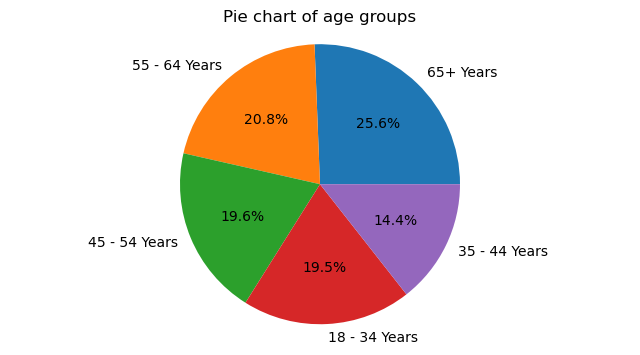

In [738]:
age_category_value = df['age_group'].value_counts()

#create the pie chart
plt.figure(figsize=(8,4))
plt.pie(age_category_value, labels=age_category_value.index, autopct='%1.1f%%')
plt.title('Pie chart of age groups')
plt.axis('equal')
plt.show()

From the pie chart above 65+ years accounted for majority of the population in the dataset. 
The majority are above the age of 45. Ages 35-44 were least participated in the survey

#### How does Race, Sex and Employment compare with each other in this dataset?

<Figure size 800x600 with 0 Axes>

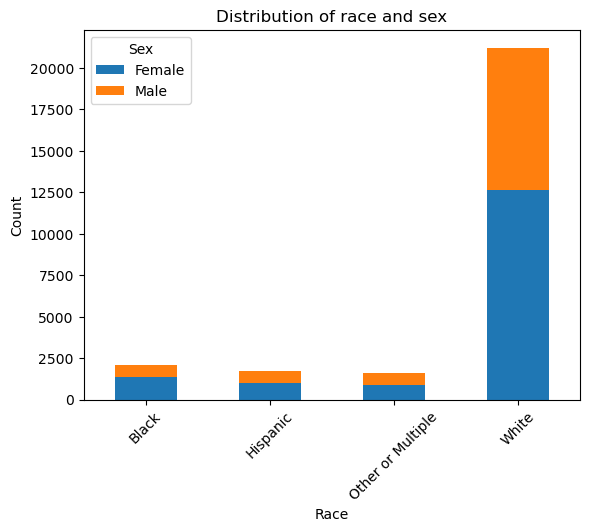

<Figure size 800x600 with 0 Axes>

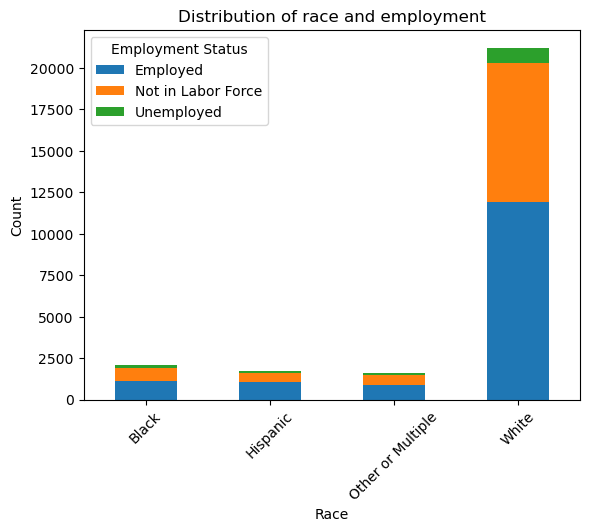

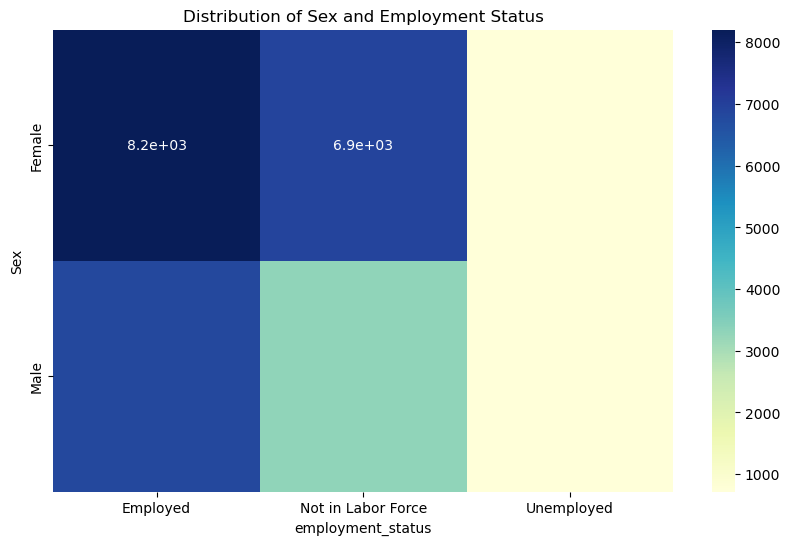

In [730]:
# Cross-tabulation of race and sex
race_sex_cross = pd.crosstab(df['race'], df['sex'])
# Cross-tabulation of race and employment_status
race_emp_cross = pd.crosstab(df['race'], df['employment_status'])

# Stacked bar chart for race and sex
plt.figure(figsize=(8,6))
race_sex_cross.plot(kind='bar', stacked=True)
plt.title('Distribution of race and sex')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

# Stacked bar chart for race and employment_status
plt.figure(figsize=(8,6))
race_emp_cross.plot(kind='bar', stacked=True)
plt.title('Distribution of race and employment')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Status')
plt.show()

# Cross-tabulation of sex and employment_status
sex_emp_cross = pd.crosstab(df['sex'], df['employment_status'])
# Heatmap for sex and employment_status
plt.figure(figsize=(10, 6))
sns.heatmap(sex_emp_cross, annot=True, cmap='YlGnBu')
plt.title('Distribution of Sex and Employment Status')
plt.xlabel('employment_status')
plt.ylabel('Sex')
plt.show()

i)Race and sex

Females undertook in this survey more than males in all Races. Regarding race, white people undertook more in the survey

ii)Race and employment

Since white people undertook the survey as the majority, they had the majority in employed and the unemployed.

iii)Sex and employment

Females are the majority who are employed, however in the unemployed section they tie with the male gender

#### What is the vaccine likelihood by Gender?

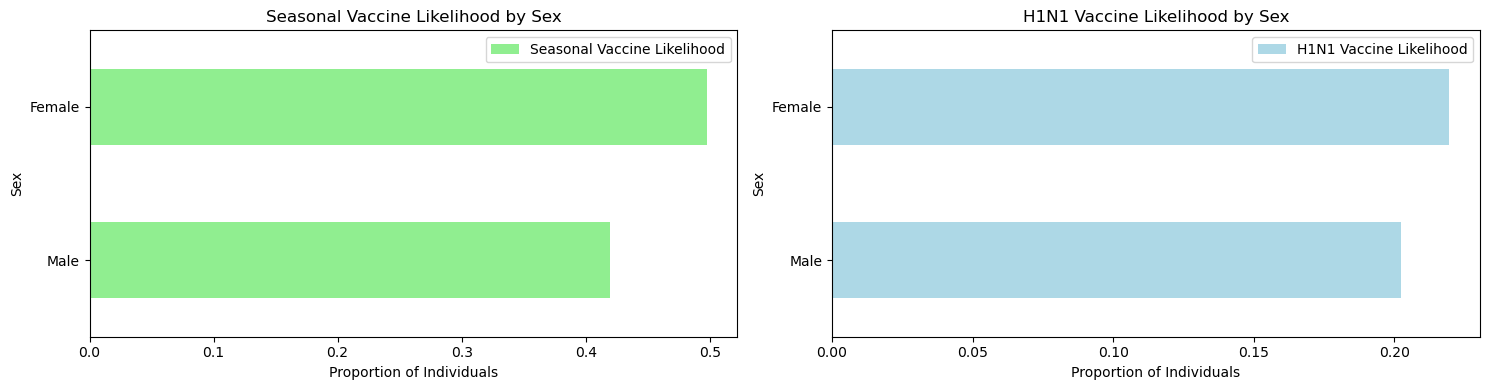

In [733]:
vaccine_likelihood_seasonal = df.groupby('sex')[['seasonal_vaccine']].mean()
vaccine_likelihood_h1n1 = df.groupby('sex')[['h1n1_vaccine']].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

vaccine_likelihood_seasonal .plot(kind='barh', color=['lightgreen'], ax = axes[0])
axes[0].set_title('Seasonal Vaccine Likelihood by Sex')
axes[0].set_xlabel('Proportion of Individuals')
axes[0].set_ylabel('Sex')
axes[0].legend(['Seasonal Vaccine Likelihood'])
axes[0].invert_yaxis()

vaccine_likelihood_h1n1.plot(kind='barh', color=['lightblue'],ax = axes[1])
axes[1].set_title('H1N1 Vaccine Likelihood by Sex')
axes[1].set_xlabel('Proportion of Individuals')
axes[1].set_ylabel('Sex')
axes[1].legend(['H1N1 Vaccine Likelihood'])
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In both vaccinations, females took the vaccines more than males

#### Which age group is likely to be vaccinated?

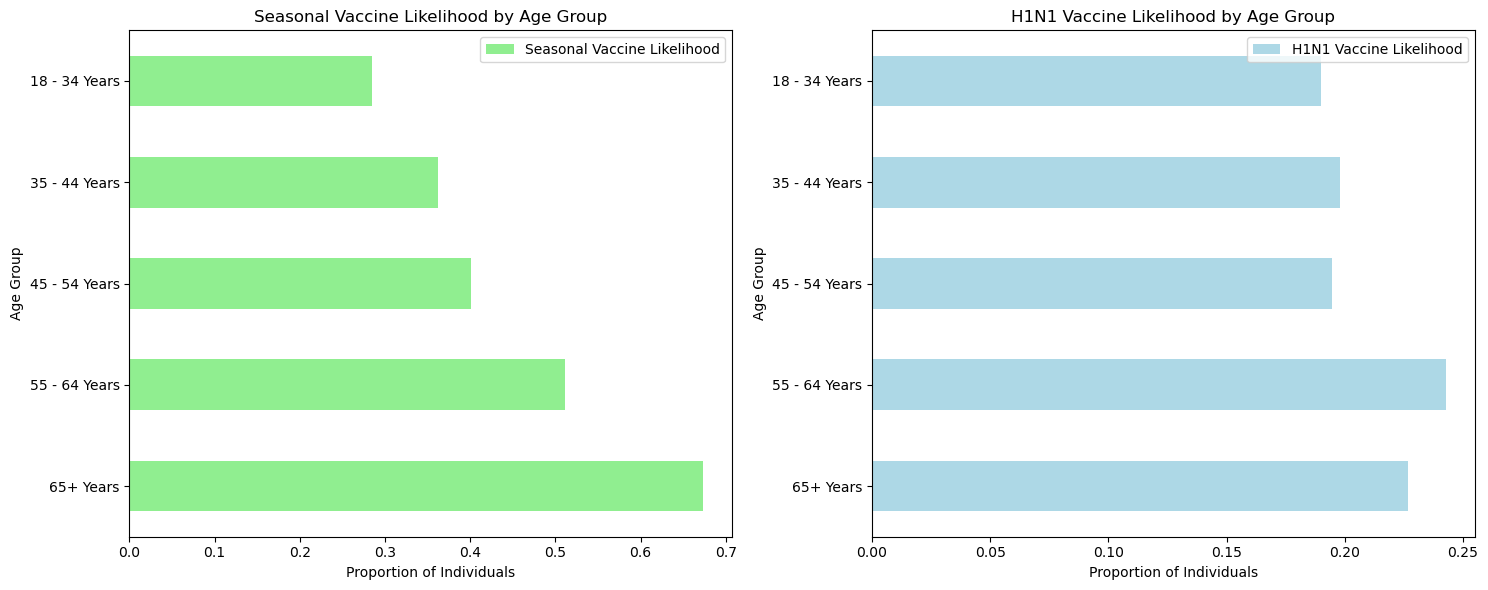

In [662]:
vaccine_likelihood_age_seasonal = df.groupby('age_group')[['seasonal_vaccine']].mean()

vaccine_likelihood_age_h1n1 = df.groupby('age_group')[['h1n1_vaccine']].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for seasonal vaccine likelihood
vaccine_likelihood_age_seasonal.plot(kind='barh', color=['lightgreen'], ax=axes[0])
axes[0].set_title('Seasonal Vaccine Likelihood by Age Group')
axes[0].set_xlabel('Proportion of Individuals')
axes[0].set_ylabel('Age Group')
axes[0].legend(['Seasonal Vaccine Likelihood'])
axes[0].invert_yaxis()

# Plot for H1N1 vaccine likelihood
vaccine_likelihood_age_h1n1.plot(kind='barh', color=['lightblue'], ax=axes[1])
axes[1].set_title('H1N1 Vaccine Likelihood by Age Group')
axes[1].set_xlabel('Proportion of Individuals')
axes[1].set_ylabel('Age Group')
axes[1].legend(['H1N1 Vaccine Likelihood'])
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

For the seasonal vaccine ages 65+ took the vaccine the most and for the H1N1 vaccine ages 55-64 took the vaccine

### What Employment status is likely to take the vaccine?

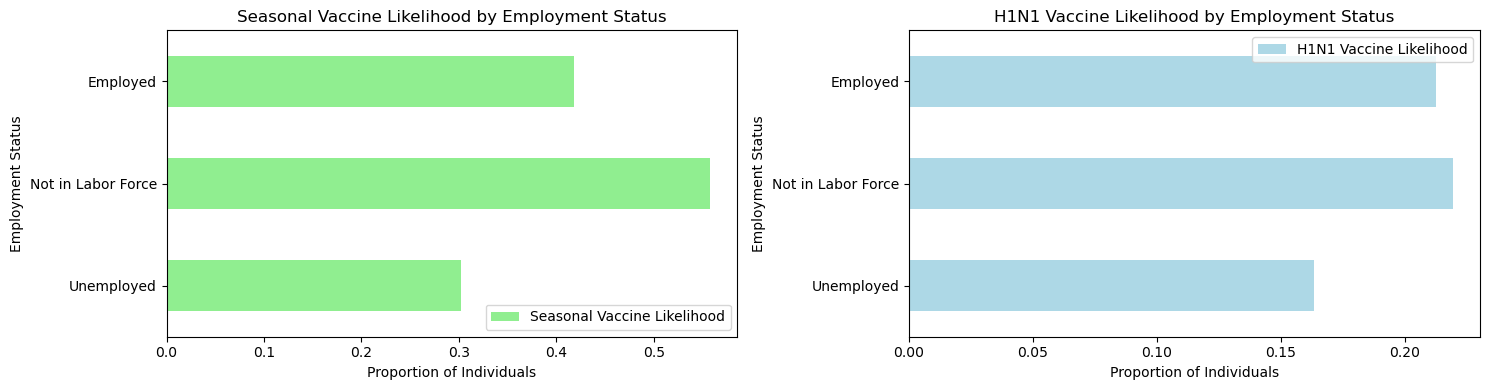

In [737]:
vaccine_likelihood_employment_status_seasonal = df.groupby('employment_status')[['seasonal_vaccine']].mean()

vaccine_likelihood_employment_status_h1n1 = df.groupby('employment_status')[['h1n1_vaccine']].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot for seasonal vaccine likelihood
vaccine_likelihood_employment_status_seasonal.plot(kind='barh', color=['lightgreen'], ax=axes[0])
axes[0].set_title('Seasonal Vaccine Likelihood by Employment Status')
axes[0].set_xlabel('Proportion of Individuals')
axes[0].set_ylabel('Employment Status')
axes[0].legend(['Seasonal Vaccine Likelihood'])
axes[0].invert_yaxis()

# Plot for H1N1 vaccine likelihood
vaccine_likelihood_employment_status_h1n1.plot(kind='barh', color=['lightblue'], ax=axes[1])
axes[1].set_title('H1N1 Vaccine Likelihood by Employment Status')
axes[1].set_xlabel('Proportion of Individuals')
axes[1].set_ylabel('Employment Status')
axes[1].legend(['H1N1 Vaccine Likelihood'])
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

According to the barchart, majority of those who take seasonal vaccine are **not in the labour force** and it's still the same 
result for those who took the H1N1

#### Which race is likely to take the individual vaccines?

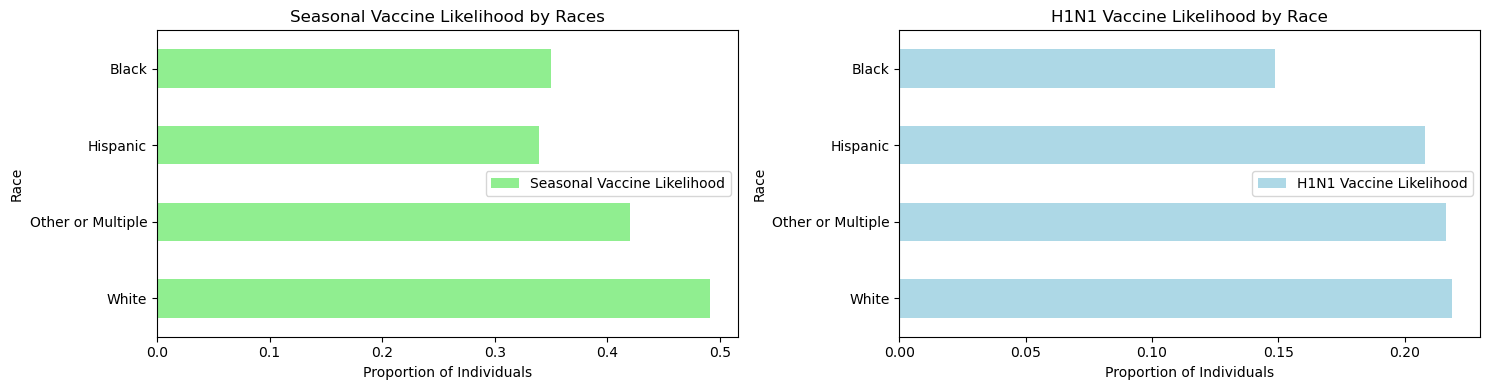

In [735]:
vaccine_likelihood_race_seasonal = df.groupby('race')[['seasonal_vaccine']].mean()

vaccine_likelihood_race_h1n1 = df.groupby('race')[['h1n1_vaccine']].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot for seasonal vaccine likelihood
vaccine_likelihood_race_seasonal.plot(kind='barh', color=['lightgreen'], ax=axes[0])
axes[0].set_title('Seasonal Vaccine Likelihood by Races')
axes[0].set_xlabel('Proportion of Individuals')
axes[0].set_ylabel('Race')
axes[0].legend(['Seasonal Vaccine Likelihood'])
axes[0].invert_yaxis()

# Plot for H1N1 vaccine likelihood
vaccine_likelihood_race_h1n1.plot(kind='barh', color=['lightblue'], ax=axes[1])
axes[1].set_title('H1N1 Vaccine Likelihood by Race')
axes[1].set_xlabel('Proportion of Individuals')
axes[1].set_ylabel('Race')
axes[1].legend(['H1N1 Vaccine Likelihood'])
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

White people are most likely to take the seasonal vaccine and black people are the least likely,
while in the H1N1 vaccine both white people and 
other/multiple races are most likely to take the H1N1 vaccine and the hispanics are least likely to take the vaccine

#### On which education level are people likely to take the vaccine?

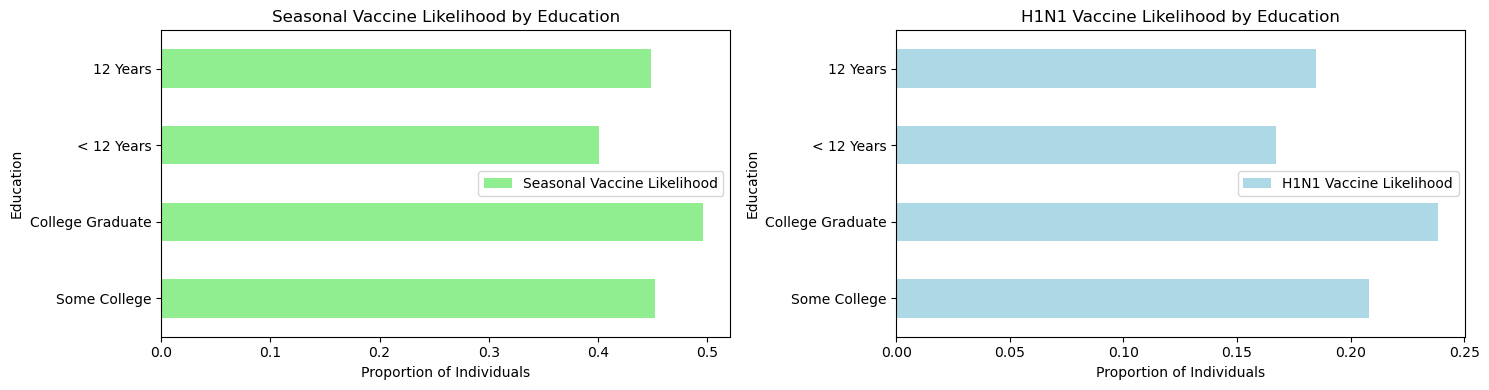

In [734]:
vaccine_likelihood_education_seasonal = df.groupby('education')[['seasonal_vaccine']].mean()

vaccine_likelihood_education_h1n1 = df.groupby('education')[['h1n1_vaccine']].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot for seasonal vaccine likelihood
vaccine_likelihood_education_seasonal.plot(kind='barh', color=['lightgreen'], ax=axes[0])
axes[0].set_title('Seasonal Vaccine Likelihood by Education')
axes[0].set_xlabel('Proportion of Individuals')
axes[0].set_ylabel('Education')
axes[0].legend(['Seasonal Vaccine Likelihood'])
axes[0].invert_yaxis()

# Plot for H1N1 vaccine likelihood
vaccine_likelihood_education_h1n1.plot(kind='barh', color=['lightblue'], ax=axes[1])
axes[1].set_title('H1N1 Vaccine Likelihood by Education')
axes[1].set_xlabel('Proportion of Individuals')
axes[1].set_ylabel('Education')
axes[1].legend(['H1N1 Vaccine Likelihood'])
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In both vaccination cases, people who have graduated college are most likely to take the vaccine while those who have less than 12 years of education are least likely to take the vaccine

#### Are respondents with chronic medication likely to take the vaccine?

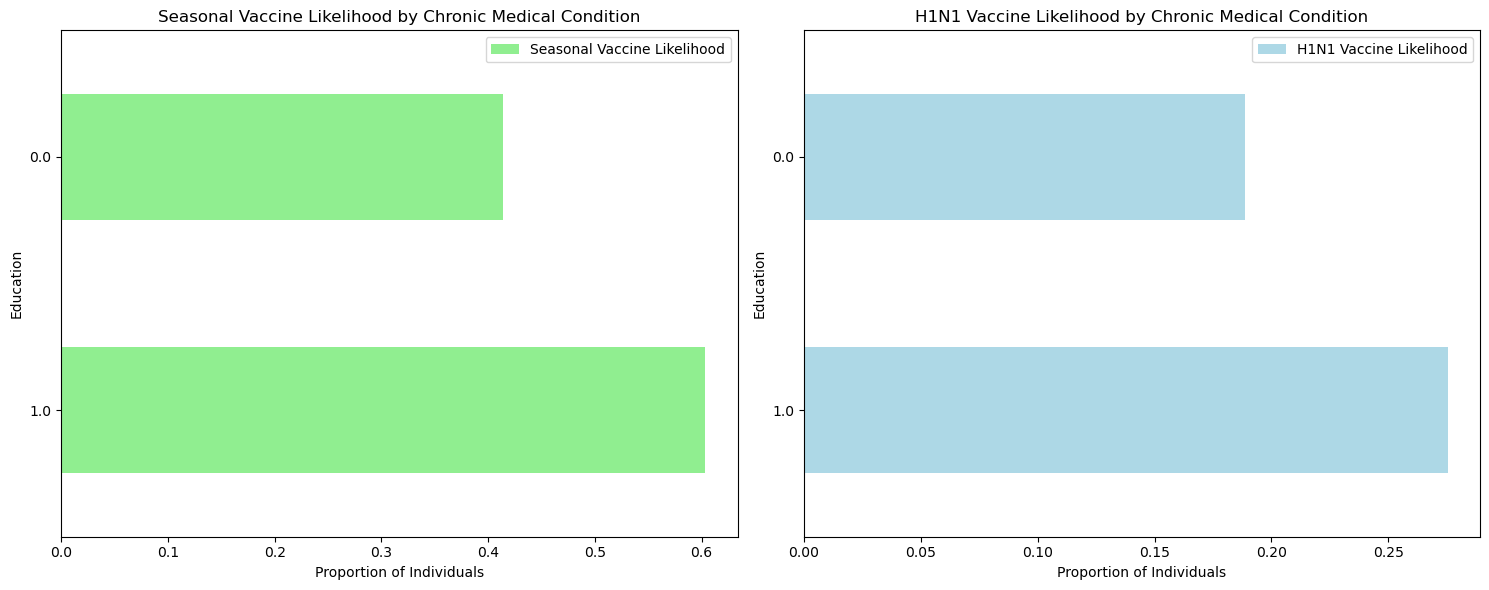

In [666]:
vaccine_likelihood_chronic_med_condition_seasonal = df.groupby('chronic_med_condition')[['seasonal_vaccine']].mean()

vaccine_likelihood_chronic_med_condition_h1n1 = df.groupby('chronic_med_condition')[['h1n1_vaccine']].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for seasonal vaccine likelihood
vaccine_likelihood_chronic_med_condition_seasonal.plot(kind='barh', color=['lightgreen'], ax=axes[0])
axes[0].set_title('Seasonal Vaccine Likelihood by Chronic Medical Condition')
axes[0].set_xlabel('Proportion of Individuals')
axes[0].set_ylabel('Education')
axes[0].legend(['Seasonal Vaccine Likelihood'])
axes[0].invert_yaxis()

# Plot for H1N1 vaccine likelihood
vaccine_likelihood_chronic_med_condition_h1n1.plot(kind='barh', color=['lightblue'], ax=axes[1])
axes[1].set_title('H1N1 Vaccine Likelihood by Chronic Medical Condition')
axes[1].set_xlabel('Proportion of Individuals')
axes[1].set_ylabel('Education')
axes[1].legend(['H1N1 Vaccine Likelihood'])
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

(1) represents respondents with chronic medical condition and (0) represents respondents without chronic medical condition.

In both vaccinations, respondents with chronic medical conditions are most likely to take the vaccination

#### How does behaviour affects vaccine intake?

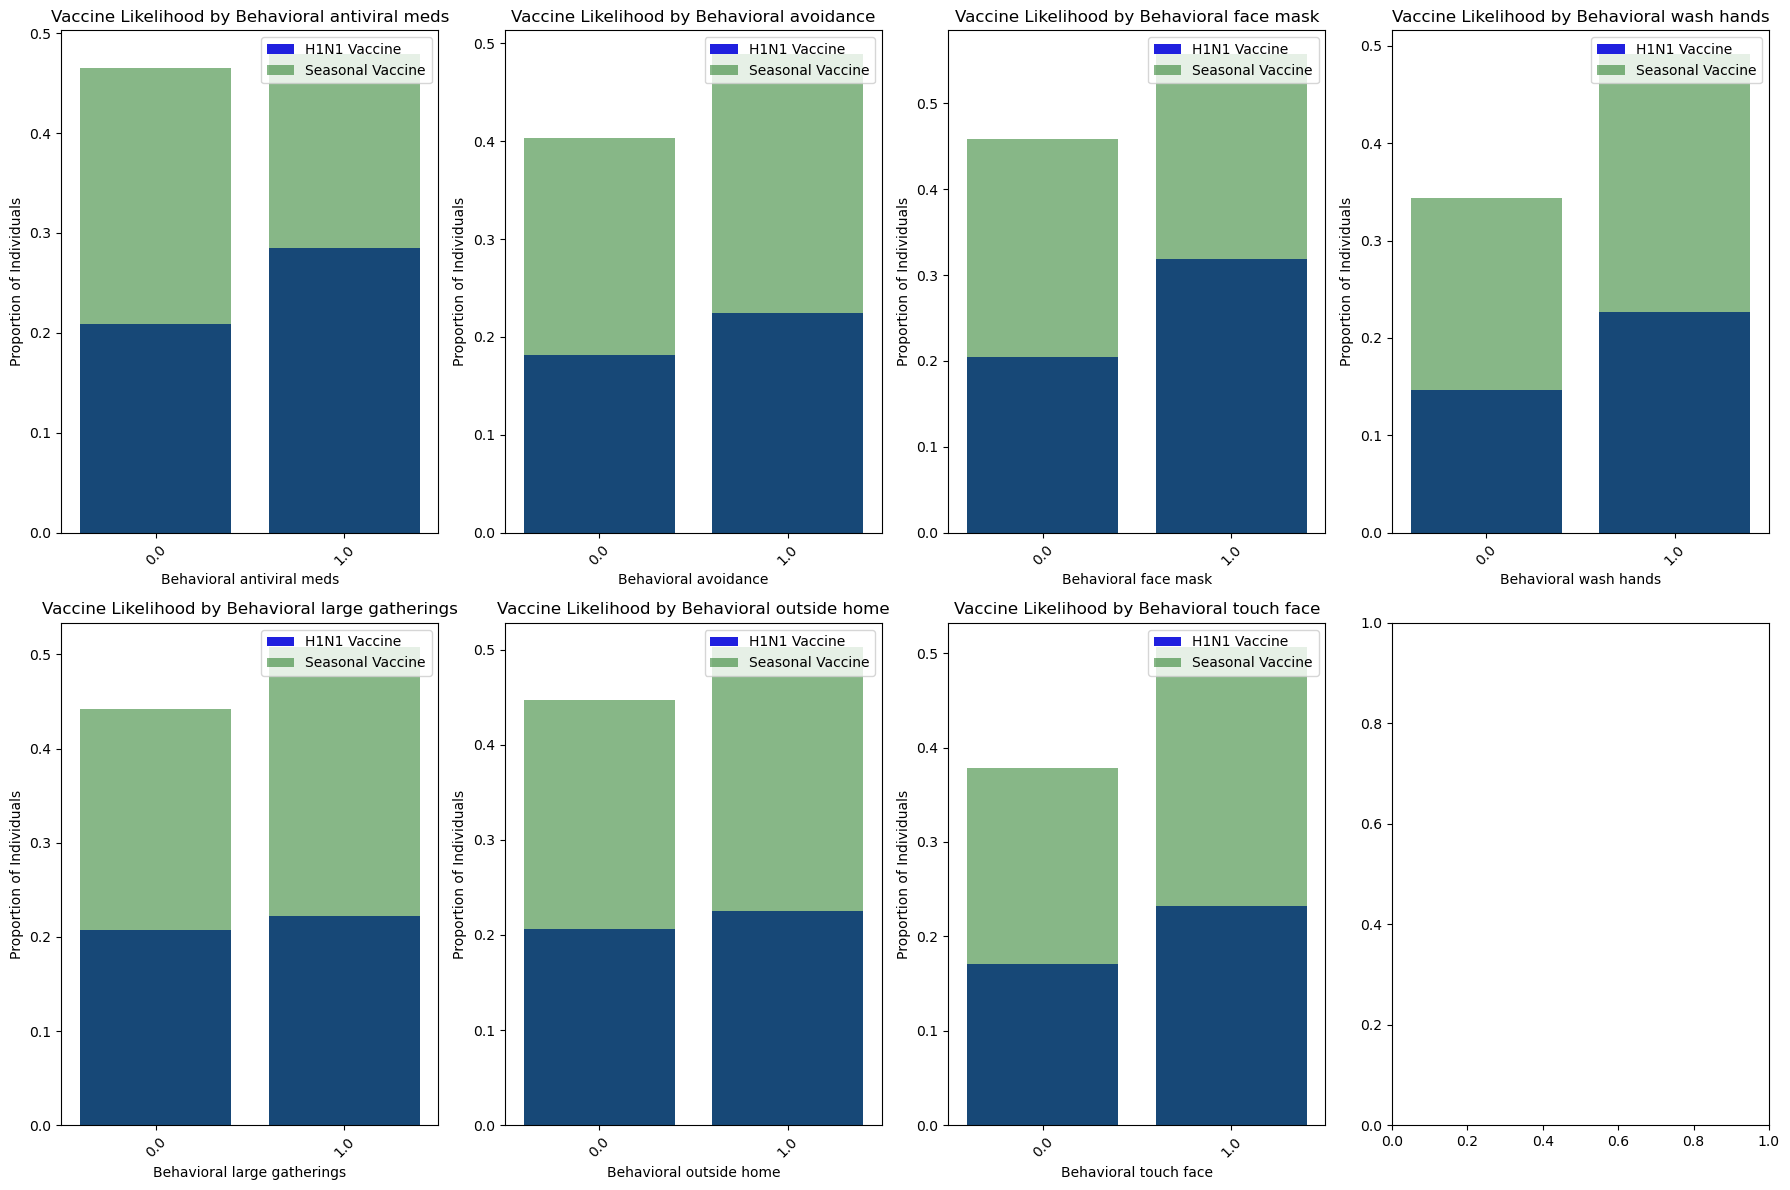

In [667]:
behavioral_variables = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 
    'behavioral_touch_face'
]


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))

# Iterating through each behavioral variable and corresponding subplot
for i, x in enumerate(behavioral_variables):
    row = i // 4
    col = i % 4
    
    
    vaccine_likelihood = df.groupby(x)[['h1n1_vaccine', 'seasonal_vaccine']].mean()
    
    
    sns.barplot(x=vaccine_likelihood.index, y='h1n1_vaccine', data=vaccine_likelihood, color='blue', ax=axes[row, col], label='H1N1 Vaccine')
    sns.barplot(x=vaccine_likelihood.index, y='seasonal_vaccine', data=vaccine_likelihood, color='green', ax=axes[row, col], label='Seasonal Vaccine', alpha=0.5)
    
    axes[row, col].set_title('Vaccine Likelihood by {}'.format(x.replace('_', ' ').capitalize()))
    axes[row, col].set_xlabel(x.replace('_', ' ').capitalize())
    axes[row, col].set_ylabel('Proportion of Individuals')
    axes[row, col].legend(loc='upper right')  
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


Results on:

(a) **behavioral_antiviral_meds**

Those who antiviral medications are likely to take H1N1 vaccine and who didn't are likely to take seasonal vaccine.

(b) **behavioral_avoidance**

Those who have avoided close contact with others with flu-like symptoms are likely to take seasonal vaccine, also those who did not avoid close contact with flu-like symptons are also likely to take seasonal vaccine.

(c) **behavioral_face_mask**

Those who bought a face mask are more likely to take the H1N1 vaccine, while those who didn't buy a facemask are more likely to take the seasonal vaccine.

(d) **behavioral_wash_hands**

Those who frequently washed hands or used hand sanitizer are more likely to take the seasonal vaccine and consequently those who did not are also more likely to take the seasonal flu vaccine.

(e) **behavioral_large_gatherings**

Those who have reduced time at large gatherings are more likely to take the seasonal vaccine, and the same applies to those who are partaking in large gatherings as they are still likely to take the seasonal vaccine.

(f) **behavioral_outside_home**

Those who have reduced contact with people outside of their own household are more likely to take the seasonal vaccine, and the same applies to those who are still in large contact with people outside their homes as they are still likely to take the seasonal vaccine.

(g) **behavioral_touch_face**

Those who have avoided touching eyes, nose, or mouth are more likely to take seasonal vaccine and those who did not avoid touching their face are also likely to take the seasonal vaccine over the H1N1 vaccine

### 3. Data Prepocessing

In [668]:
df.head(5)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [669]:
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
marital_status                  object
rent_or_own              

**Encoding catregorical variables**

In [670]:
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
marital_status                  object
rent_or_own              

In [671]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [672]:
#drop 'seasonal_vaccine', 'h1n1_vaccine' as they are our target variables and they are binary
df_filtered = df.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1)

# Get categorical columns
non_numeric_cols = df_filtered.columns[df_filtered.dtypes == 'object'].values

# Get numeric columns
numeric_cols = df_filtered.columns[df_filtered.dtypes != 'object'].values

df_numeric = df_filtered[numeric_cols]
df_numeric

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0


Introduce a pipeline for scaling numerical variables and encoding categorical variables via OneHotEncoder

In [673]:
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
])

non_numeric_preprocessing_steps = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

#combine the pipelines
preprocessor = ColumnTransformer(
    transformers = [
        ('numeric', numeric_preprocessing_steps, numeric_cols),
        ('non_numeric', non_numeric_preprocessing_steps, non_numeric_cols)  
    ],
    remainder = "drop"
)

In [674]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standard_scaler',
                                                  StandardScaler())]),
                                 array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'doctor_recc_h1n1', 'doctor_recc_sea...
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children'], dtype=object)),
                                ('non_numeric',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 array(['age_group', 'education', 'race', 'sex', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa'], dtype=object))])

### 4. Modelling

Modelling for **Seasonal Vaccine**

Selecting the independent and dependent variables for our model

In [675]:
X_seasonal = df.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis = 1)
y_seasonal = df['seasonal_vaccine']
X_seasonal

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0


In [676]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seasonal, y_seasonal, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21365, 30), (5342, 30), (21365,), (5342,))

In [677]:
#Transform features in the X_train and X_test variables from the Pipelines defined above
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test =  pd.DataFrame(preprocessor.transform(X_test))
X_train.shape, X_test.shape

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0.419235,-0.427888,-0.227459,0.613397,-0.274987,0.462366,-0.744569,1.404097,0.690292,-0.505698,-0.663164,1.625477,-0.294114,-0.352305,1.147026,1.297245,-0.262888,-0.027050,0.938861,-0.089913,0.146534,-0.572913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.419235,-0.427888,4.396392,0.613397,3.636532,0.462366,1.343058,1.404097,0.690292,-0.505698,-0.663164,-0.615204,-0.294114,-0.352305,1.147026,1.297245,1.214971,0.905071,0.938861,1.423271,-1.185112,-0.572913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.783386,-0.427888,-0.227459,-1.630265,-0.274987,0.462366,-0.744569,1.404097,-1.448662,-0.505698,-0.663164,-0.615204,-0.294114,-0.352305,-2.846653,-0.266358,-1.001818,-2.823411,0.938861,-0.846505,0.146534,0.506382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.682076,-0.427888,-0.227459,-1.630265,-0.274987,-2.162788,-0.744569,-0.712202,-1.448662,-0.505698,-0.663164,-0.615204,-0.294114,-0.352305,0.148606,-0.266358,-1.001818,-0.027050,-0.514673,-0.089913,-1.185112,-0.572913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.682076,-2.049354,-0.227459,-1.630265,-0.274987,0.462366,-0.744569,-0.712202,-1.448662,-0.505698,-0.663164,-0.615204,-0.294114,-0.352305,-0.849813,-0.266358,1.953901,0.905071,-0.514673,2.179863,0.146534,0.506382,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21360,0.419235,-0.427888,-0.227459,-1.630265,-0.274987,0.462366,-0.744569,-0.712202,0.690292,-0.505698,-0.663164,-0.615204,-0.294114,-0.352305,0.148606,-0.266358,-0.262888,-0.027050,-0.514673,-0.846505,-1.185112,-0.572913,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
21361,-0.682076,-0.427888,-0.227459,-1.630265,-0.274987,0.462366,-0.744569,-0.712202,0.690292,-0.505698,-0.663164,-0.615204,-0.294114,-0.352305,0.148606,-0.266358,-1.001818,-0.027050,-0.514673,1.423271,-1.185112,-0.572913,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21362,0.419235,-0.427888,-0.227459,0.613397,-0.274987,-2.162788,-0.744569,-0.712202,0.690292,-0.505698,-0.663164,-0.615204,-0.294114,-0.352305,0.148606,-0.266358,-0.262888,-0.027050,-0.514673,-0.089913,0.146534,-0.572913,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21363,0.419235,-0.427888,-0.227459,0.613397,-0.274987,0.462366,-0.744569,-0.712202,0.690292,1.977464,1.507922,1.625477,-0.294114,2.838451,-2.846653,-1.048159,1.214971,-2.823411,-1.241440,1.423271,0.146534,-0.572913,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### 4.1 Logistic Regression

In [678]:
from sklearn.linear_model import LogisticRegression

Perform GridSearchCV to determine the best parameters to use for our Logistic Regression Model

In [679]:

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],                # Penalty type
    'solver': ['liblinear']                 # Solver algorithm
}


# Instantiate logistic regression model
logreg = LogisticRegression(fit_intercept=False)

# Perform grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7737421015679851
Test Set Accuracy: 0.7826656682890303


Given the hyperparameters above, the model has an accuracy of 77% and a test accuracy of 78%. That is pretty good. We will use
the hyperparameters above for our Logistic Regression Model

In [680]:
logreg = LogisticRegression(fit_intercept=False, C=0.01, penalty='l2', solver='liblinear')

# Fit the model
model = logreg.fit(X_train,y_train)

Generating predictions for the training and test sets.

In [681]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [682]:
train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals training (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals training (proportions)").value_counts(normalize=True))

Residuals training (counts)
0    16555
1     4810
Name: count, dtype: int64

Residuals training (proportions)
0    0.774865
1    0.225135
Name: proportion, dtype: float64


In [683]:
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(train_residuals, name="Residuals test (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals test (proportions)").value_counts(normalize=True))

Residuals test (counts)
0    16555
1     4810
Name: count, dtype: int64

Residuals test (proportions)
0    0.774865
1    0.225135
Name: proportion, dtype: float64


The model performs similarly on both training set and test set data, it suggests that the model has learned the underlying patterns in the data rather than memorizing the training set (which would lead to overfitting).

**Confusion matrix**

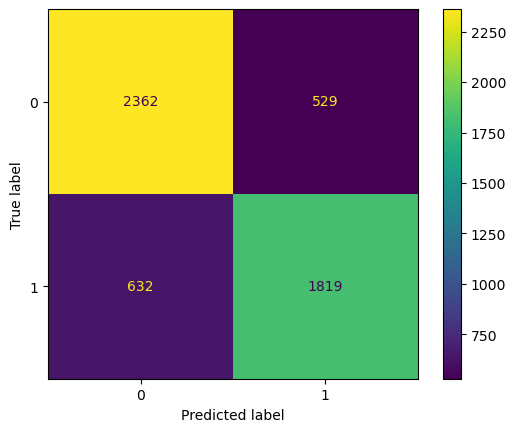

In [684]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, y_hat_test , labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

The model has more True Negatives(2362) than True Positives (1819). The model is better at correctly identifying instances that do not lead to getting a seasonal flu vaccine compared to correctly identifying instances that do lead to getting a seasonal flu vaccine

Here's how it relates to the context of classifying variables leading to a seasonal flu vaccine:

True Positives (1819): These are individuals who are correctly identified as likely to get a seasonal flu vaccine based on the variables considered in the model. In this context, it means correctly identifying individuals who are likely to get vaccinated.

True Negatives (2362): These are individuals who are correctly identified as not likely to get a seasonal flu vaccine based on the variables considered in the model. In this context, it means correctly identifying individuals who are not likely to get vaccinated.

False Positives (529): These are individuals who are incorrectly identified as likely to get a seasonal flu vaccine when they actually don't. In this context, it means incorrectly identifying individuals as likely to get vaccinated when they won't.

False Negatives (632): These are individuals who are incorrectly identified as not likely to get a seasonal flu vaccine when they actually do. In this context, it means incorrectly identifying individuals as not likely to get vaccinated when they will.


**Getting the accuracy of our model**

In [685]:
#trainig
precision_train_sklearn = precision_score(y_train, model.predict(X_train))
recall_train_sklearn = recall_score(y_train, model.predict(X_train))
accuracy_train_sklearn = accuracy_score(y_train, model.predict(X_train))
f1_train_sklearn = f1_score(y_train, model.predict(X_train))
#testing
precision_test_sklearn = precision_score(y_test, model.predict(X_test))
recall_test_sklearn = recall_score(y_test, model.predict(X_test))
accuracy_test_sklearn = accuracy_score(y_test, model.predict(X_test))
f1_test_sklearn = f1_score(y_test, model.predict(X_test))

print("Sklearn functions - Training set metrics:")
print("Precision:", precision_train_sklearn)
print("Recall:", recall_train_sklearn)
print("Accuracy:", accuracy_train_sklearn)
print("F1 Score:", f1_train_sklearn)
print()
print("Sklearn functions - Testing set metrics:")
print("Precision:", precision_test_sklearn)
print("Recall:", recall_test_sklearn)
print("Accuracy:", accuracy_test_sklearn)
print("F1 Score:", f1_test_sklearn)

Sklearn functions - Training set metrics:
Precision: 0.7727752003374104
Recall: 0.7340745192307693
Accuracy: 0.7748654341212263
F1 Score: 0.7529278816519417

Sklearn functions - Testing set metrics:
Precision: 0.774701873935264
Recall: 0.7421460628314973
Accuracy: 0.7826656682890303
F1 Score: 0.7580745988747656


**Precision:**

Training Set: The model correctly identifies about 77% of the individuals who actually received the seasonal vaccine among all the individuals predicted to have received it.
Testing Set: Similarly, the model correctly identifies about 77% of the individuals who actually received the seasonal vaccine among all the individuals predicted to have received it.

**Recall:**

Training Set: The model captures about 73% of all the individuals who actually received the seasonal vaccine.
Testing Set: The model improved on the testing set and captured about 74% of all the individuals who actually received the seasonal vaccine.

**Accuracy:**

Training Set: The model accurately predicts the seasonal vaccine status of approximately 77% of the individuals in the training set.
Testing Set: The model improved on the testing set and had an accuracy of 78% of the individuals in the testing set.

**F1 Score:**

Training Set: The F1 score, which is the harmonic mean of precision and recall, is approximately 75%.
Testing Set: The F1 score for the testing set improved by 1% to 76%.


Overall, these metrics indicate that the logistic regression model performs reasonably well in predicting the seasonal vaccine status based on the given features. The model achieves relatively high precision, recall, accuracy, and F1 score on both the training and testing sets, suggesting that it effectively learns the underlying patterns in the data and generalizes well to unseen data. However, further analysis may be needed to identify areas for improvement and potential biases in the model's predictions.

In [686]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for the logistic regression model
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8507401591427186


Our ROC AUC score is 0.85 which indicates that the logistic regression model has good discriminative ability. Specifically, this suggests that the model can distinguish between positive and negative instances (whether individuals received the seasonal flu vaccine) quite well. Higher ROC AUC scores closer to 1 indicate better model performance, with 1 being a perfect score.

In conclusion, a ROC AUC score of 0.85 is  quite good and suggests that the logistic regression model is effective at making predictions for the task at hand.

### 4.2 Decision Trees

In [687]:
# Train a DT classifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [688]:
# Make predictions for test data
dt_y_hat_test = clf.predict(X_test)

In [689]:
acc = accuracy_score(y_test, y_hat_test)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = roc_auc_score(y_test, y_hat_test)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


Accuracy is :0.7826656682890303

AUC is :0.78


The decision tree model correctly predicted 78% of the instances in the test set.

In [703]:
# Mean training score
dt_training_score = clf.score(X_train, y_train)

# Mean test score
dt_testing_score =  clf.score(X_test, y_test)

print(f"Mean Training Score: {dt_training_score :.2%}")
print(f"Mean Test Score: {dt_testing_score :.2%}")

Mean Training Score: 99.97%
Mean Test Score: 68.31%
Best Parameter Combination Found During Grid Search:


The decision tree model is overfitting, since the training score is so high yet when the model is introduced to the testing
set the score drops to 68%. Let's get the cross validation score of the model then find the best parameters for our model 
in order to deal with the overfitting

In [690]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = dt_cv_score.mean()

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 67.58%


With a  mean cross-validation score of 68%, this suggests that, on average, the Decision Tree Classifier correctly
predicts the target variable for approximately 68% of the observations in the training data when evaluated using
cross-validation. This score is a useful indicator of the model's generalization performance. Searching for the best parameters
for the decision tree will be required to improve the mean cross validation score

In [691]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [692]:
"""
For criterion, there are 2 options ("gini" and "entropy").
For max_depth, there are 6 options (None, 2, 3, 4, 5, and 6).
For min_samples_split, there are 3 options (2, 5, and 10).
For min_samples_leaf, there are 6 options (1, 2, 3, 4, 5, and 6).
We are using 3-fold cross-validation.
"""
num_decision_trees = 2 * 6 * 3 * 6 * 3
print(
    f"Grid Search will have to search through {num_decision_trees} different permutations."
)

Grid Search will have to search through 648 different permutations.


In [693]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)


# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [694]:
# Mean training score
dt_gs_training_score = dt_grid_search.cv_results_['mean_train_score'].mean()

# Mean test score
dt_gs_testing_score =  dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")


Mean Training Score: 77.11%
Mean Test Score: 76.17%
Best Parameter Combination Found During Grid Search:


In [701]:
dt_cv_score = cross_val_score(dt_grid_search.best_estimator_, X_train, y_train, cv=3)

# Calculate the mean cross-validation score
mean_dt_cv_score = dt_cv_score.mean()

print(f"Mean Cross Validation Score: {mean_dt_cv_score:.2%}")

Mean Cross Validation Score: 75.79%


After parameter tuning the decision tree now has a cross validation score of 76% which is an improvement from the previous one
of 68%. The decision tree before hyperparameter tuning was overfitting by a large margin(99% - 68%). After hyperparameter tuning
the decision tree, the training and test set have the same score of 76%

### 4.3 Random Forest

Instantiate a RandomForestClassifier with a cross-validation of 3

In [695]:
rf_clf = RandomForestClassifier(random_state=42)
mean_rf_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=3).mean()

print(
    f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}"
)

Mean Cross Validation Score for Random Forest Classifier: 77.08%


The Random Forest has a cross-validation score of 77% which implies that the Random Forest Classifier correctly predicts
the target variable (likelihood of getting a seasonal flu vaccine) for
approximately 77% of the instances in the dataset. This suggests that the model performs reasonably well and has a moderate level of accuracy. A gridsearch will be performed to get the best parameters for the RandomForest Classifier

In [696]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_classifier = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [705]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier with the best hyperparameters
tuned_rf_classifier = RandomForestClassifier(max_depth=20, min_samples_leaf=4,
                                             min_samples_split=10, n_estimators=300,
                                             random_state=42)


tuned_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test data
train_accuracy = tuned_rf_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = tuned_rf_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

mean_rf_cv_score_best = cross_val_score(tuned_rf_classifier, X_train, y_train).mean()

print(
    f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}"
)


Training Accuracy: 0.8628598174584601
Testing Accuracy: 0.780980906027705
Mean Cross Validation Score for Random Forest Classifier: 77.08%


After tuning the hyperparameters, the model still has the same validation score 
of 77% but the model is overfitting. To deal with this GradientBoosting will be introduced to reduce overfitting in the model

In [698]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(random_state=42)

gbm_classifier.fit(X_train, y_train)

train_accuracy = gbm_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = gbm_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7863795927919495
Testing Accuracy: 0.786035192811681


Gradient Boosting Machine (GBM) model has reduced overfitting compared to the Random Forest model, as the training and testing accuracies are closer. This suggests that the GBM model has generalized better to unseen data.

In [699]:
y_pred = gbm_classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.7837509337282617
F1 Score: 0.7642812951123943
Recall: 0.7560179518563851
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2891
           1       0.77      0.76      0.76      2451

    accuracy                           0.79      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.79      0.79      0.79      5342



A precision score of 0.78 indicates good discriminatory power, 
it suggests that the classifier will rank a randomly chosen positive instance higher 
than a randomly chosen negative instance.


An f1 score of 0.76 suggests that the classifier achieves a good balance between precision (the ability to make accurate positive predictions) and recall (the ability to capture most positive instances).
Recall: 0.756

A recall score of 0.76 indicates that the classifier is able to capture a substantial portion of the positive instances.

These metrics indicate that the GBM classifier is performing well in terms of discriminating between classes and 
accurately identifying positive instances, which is crucial for identifying whether a person will take the seasonal vaccine
or not.

### 5. Conclusion


We  experimented with three different types of models: Logistic Regression, Random Forest, and Gradient Boosting Machine (GBM). For each model, we performed hyperparameter tuning using grid search to optimize model performance.

The logistic regression model provided a solid baseline, achieving an accuracy of approximately 78% on the test set. However, it exhibited signs of bias towards predicting individuals who are less likely to get vaccinated, which could lead to higher false negative rates.

Next, we explored ensemble methods like Random Forest and GBM. Random Forest improved upon the logistic regression model, achieving a test accuracy of approximately 78% after hyperparameter tuning. However, it still suffered from some overfitting.

To address overfitting, we employed Gradient Boosting Machine (GBM). The GBM model demonstrated improved generalization performance, with training and testing accuracies converging closer together. It achieved a test accuracy of approximately 79%, along with good precision, recall, and F1 score metrics.


In conclusion, the GBM model is the most suitable model for predicting seasonal flu vaccine uptake and providing valuable insights for healthcare practitioners and policymakers. 

### 6. Recommendation

The National Vaccination Advisory committee should:
    
(a) Implement educational initiatives to raise awareness about the need of flu vaccination and address any misconceptions or concerns raised in the dataset. These efforts could use social media, community outreach activities, and healthcare practitioner communications.

(b) Encourage healthcare providers to offer flu vaccinations to their patients, especially those with chronic medical conditions or other risk factors. They should provide training and tools to healthcare providers that will help them communicate the benefits of vaccination more effectively.

(c) Develop tailored approaches to boost vaccine uptake. These interventions could be tailored to certain demographic groups or individuals who hold particular health beliefs or practices.

(d) Encourage collaboration among public health authorities, healthcare providers, community organizations, and other stakeholders to execute comprehensive immunization strategies. Partnerships and collaborative efforts can increase the reach and effectiveness of vaccination campaigns.

